## Classification 使用Pytorch做分类

In [6]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

准备数据

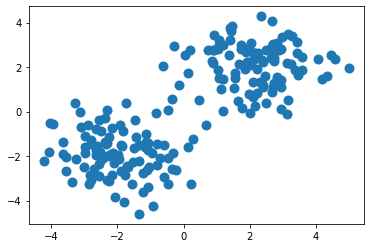

In [7]:
n_data = torch.ones(100, 2)  # 100个具有2个属性的数据 shape=(100,2)
x0 = torch.normal(2*n_data, 1)  # 根据原始数据生成随机数据，第一个参数是均值，第二个是方差，这里设置为1了，shape=(100,2)
y0 = torch.ones(100)  # 100个0作为第一类数据的标签，shape=(100,1)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.zeros(100)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # cat数据合并 32-bit floating
y = torch.cat((y0, y1), 0).type(torch.LongTensor)   # 64-bit integer

x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], s=100, lw=0)
plt.show()

 构建网络

In [8]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return F.sigmoid(x)

net = Net(2, 10, 2)  # 数据是二维的所以输入特征是2，输出是两种类别所以输出层特征是2
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


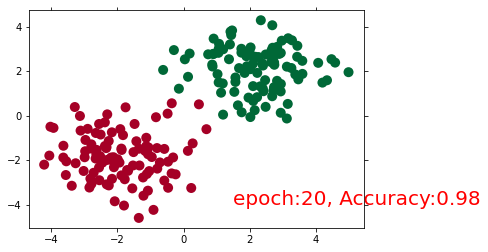

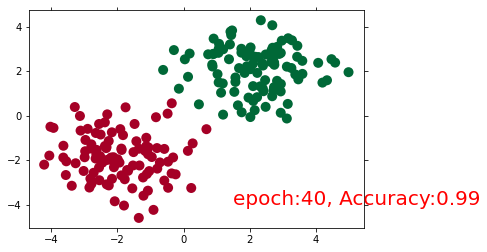

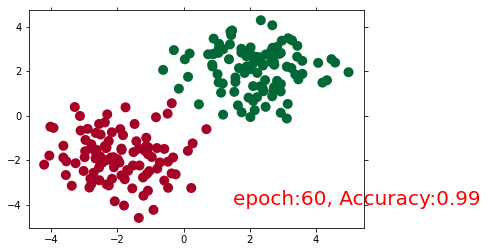

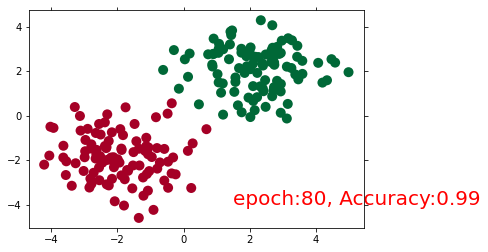

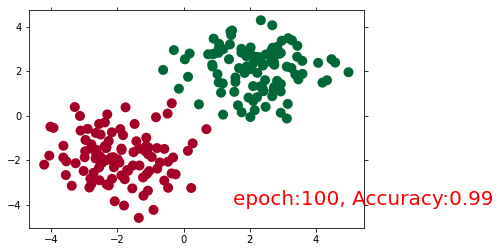

In [11]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # 交叉熵 CrossEntropy [0.1, 0.2, 0.7] [0,0,1] 数据越大，是这一类的概率越大

for t in range(1, 101):
    out = net.forward(x)     # 数据经过所有的网络，输出预测值
    loss = loss_func(out, y) # 输入与预测值之间的误差loss
    optimizer.zero_grad()    # 梯度重置
    loss.backward()          # 损失值反向传播，计算梯度
    optimizer.step()         # 梯度优化
    if t % 20 == 0:
        # 画图部分 plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, f'epoch:{t}, Accuracy:{accuracy:.2f}', fontdict={'size': 20, 'color':  'red'})

        plt.pause(0.5)
# plt.ioff()
plt.show()

In [12]:
out = net.forward(x)
print(out)


tensor([[0.0401, 0.9576],
        [0.0740, 0.9134],
        [0.0274, 0.9748],
        [0.0196, 0.9848],
        [0.0692, 0.9203],
        [0.0332, 0.9586],
        [0.0709, 0.9430],
        [0.1241, 0.8942],
        [0.0919, 0.9098],
        [0.0779, 0.9270],
        [0.0559, 0.9490],
        [0.1968, 0.8250],
        [0.0150, 0.9858],
        [0.0242, 0.9767],
        [0.4794, 0.5416],
        [0.0291, 0.9733],
        [0.2622, 0.7136],
        [0.0355, 0.9558],
        [0.4219, 0.5705],
        [0.0379, 0.9635],
        [0.0935, 0.8920],
        [0.3140, 0.6335],
        [0.1871, 0.8204],
        [0.0531, 0.9508],
        [0.0776, 0.9304],
        [0.0138, 0.9895],
        [0.0966, 0.9093],
        [0.1304, 0.8576],
        [0.0237, 0.9808],
        [0.0760, 0.9267],
        [0.0841, 0.9103],
        [0.0494, 0.9464],
        [0.0468, 0.9545],
        [0.0630, 0.9397],
        [0.1661, 0.8864],
        [0.0416, 0.9629],
        [0.0948, 0.8905],
        [0.0146, 0.9891],
        [0.1